# Support Vector Regression

Support Vector Regression(SVR) is a type of Support Vector Machine (SVM) that is commonly used for regression tasks, unlike SVM that is commonly used for classification. Similar to SVM, SVR uses the concept of hyperplane and margin. The margin is defined as error tolerance of the model(ε-insensitive tube).



## Introduction

In the following example we can see how use a SVM for classification, in particular a Linear SVM. It's interesting to go and understand later in the in the next code which is the difference between SVM and SVR.
To run the code we use sklearn library.

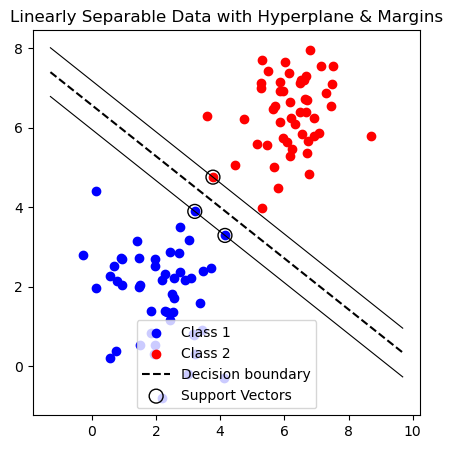

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

x1 = np.random.randn(50, 2) + np.array([2, 2])
x2 = np.random.randn(50, 2) + np.array([6, 6])
X = np.vstack((x1, x2))
y = np.hstack((np.zeros(50), np.ones(50)))

clf = SVC(kernel="linear", C=1e5)
clf.fit(X, y)

# Otteniamo i parametri dell'iperpiano
w = clf.coef_[0]
b = clf.intercept_[0]

# Funzione dell'iperpiano: w0*x + w1*y + b = 0
# Risolviamo per y = ...
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
yy = -(w[0]/w[1]) * xx - b/w[1]

# Margini
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# Plot
plt.figure(figsize=(5,5))

plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')
plt.scatter(x2[:,0], x2[:,1], color='red', label='Class 2')

# Linea decisionale tratteggiata
plt.plot(xx, yy, 'k--', label="Decision boundary")

# Margini
plt.plot(xx, yy_down, 'k-', linewidth=0.8)
plt.plot(xx, yy_up, 'k-', linewidth=0.8)

# Support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")

plt.title("Linearly Separable Data with Hyperplane & Margins")
plt.legend()



In the cose above, we generated two sets of 2D data points. The first set is linearly separable, while the second set is not linearly separable. It's a good example to highlight type of data where Linear SVM can work. It's a good example of classification problem where Linear SVM can work.
Now the problem is that not always the data are linearly separable so, in that case, We must use other type of SVM. In the follow example we can see an example of non linearly separable data.

In the preview code we can see a good example of classification but now with SVR we will see a different process.

## SVR

### Regression
Regression is a statistical and machine learning method used to predict continuous numerical values of a dependent variable from one or more independent variables, by finding a function that best approximates the relationship between inputs and outputs.

Below we can see an implementation of SVR with Linear Kernel. This s an easy example to understand how SVR works and what see a regression problem.


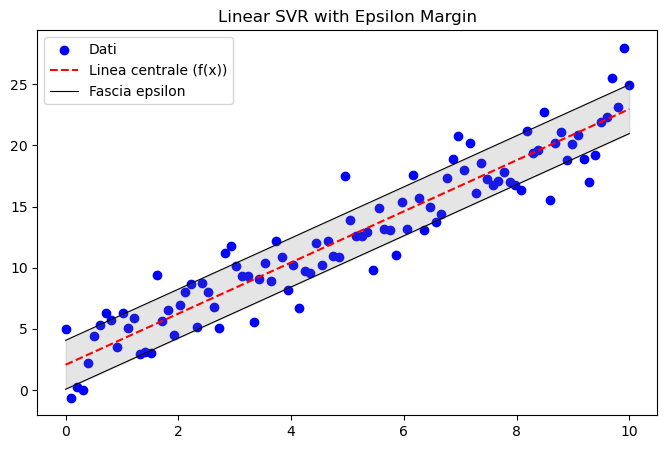

In [3]:
from sklearn.svm import SVR

# Dati di esempio (1D per semplicità)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.randn(100) * 2  # relazione lineare con rumore

# Modello SVR lineare
svr = SVR(kernel='linear', C=1, epsilon=2)
svr.fit(X, y)

# Predizione
y_pred = svr.predict(X)

# Fascia epsilon
epsilon = svr.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dati')
plt.plot(X, y_pred, 'r--', label='Linea centrale (f(x))')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Fascia epsilon')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Linear SVR with Epsilon Margin")
plt.show()


It's easy implement SRV with sklearn library. In the example above we generated some 1D data with a linear relationship and some noise. We then fit a Linear SVR model to the data and plotted the results, including the epsilon margin.
If you want you can try to change some parameters like C and epsilon to see how they affect the model.
The parameter $ C $
$ C $ in an SVR controls the trade-off between model complexity and training error.
- Small $ C $: the model becomes “softer,” meaning it allows more errors to keep a larger margin or simpler function. This can help prevent overfitting but may increase training error.
- Large $ C $: the model tries to minimize training errors, even if this means a narrower margin or more complex function. This can improve accuracy on the training set but increases the risk of overfitting on new data.

The parameter $ \varepsilon $ defines the width of the epsilon-insensitive tube around the regression function.
- Small $ \varepsilon $: the model becomes more sensitive to small deviations from the true values, leading to a tighter fit to the training data.
- Large $ \varepsilon $: the model allows for larger deviations from the true values without penalty, resulting in a smoother and more generalized function.

## Mathematical Formulation

Linear SVR aims to find a function

\begin{gather*}
f(x) = w^T x + b
\end{gather*}


that approximates the data $ (x_i, y_i) $ within a tolerance $ \varepsilon $, minimizing model complexity and errors outside the epsilon-insensitive tube:

\begin{gather*}
\min_{w, b, \xi_i, \xi_i^*} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \xi_i^*)
\end{gather*}

subject to:

$$ y_i - w^T x_i - b \leq \varepsilon + \xi_i \\ $$

$$ w^T x_i + b - y_i \leq \varepsilon + \xi_i^* \\ $$
$$ \xi_i, \xi_i^* \geq 0 $$

Where:
- $ w $ are the model weights,
- $ b $ is the bias,
- $ \varepsilon $ defines the epsilon-insensitive tube,
- $ \xi_i, \xi_i^* $ are slack variables for errors outside the tube,
- $ C $ balances model complexity versus tolerance of errors.

This formulation can be write in another easy way, without the slack variables.  If the problem is not feasible, we introduce slack variables, which are the data points that fall outside of the ε-insensitive tube.

#### Non-linear SVR with polynomial kernel
Now we can try to use a non-linear kernel, in particular a polynomial kernel. We can see how the model change with respect to the linear kernel. We can choose the degree of the polynomial kernel but carefully to avoid overfitting.


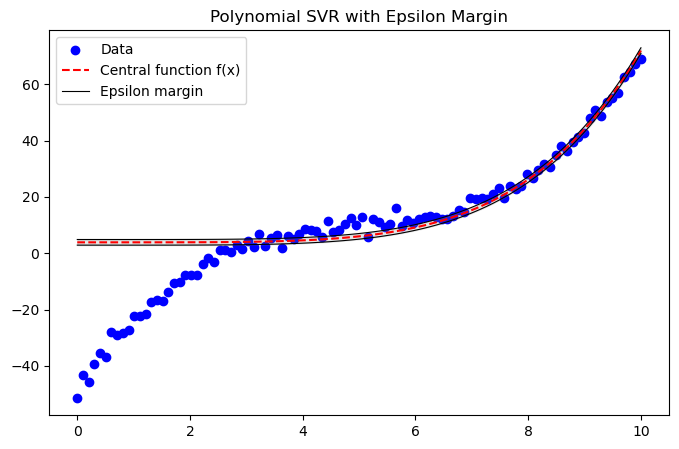

In [17]:


# Dati di esempio (1D per semplicità)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.4 * (X.ravel() - 5)**3 + 2 * X.ravel() + np.random.randn(100) * 2  # relazione non lineare

# Modello SVR con kernel polinomiale
svr_poly = SVR(kernel='poly', degree=5, C=10, epsilon=1, coef0=0)
svr_poly.fit(X, y)

# Predizione
y_pred = svr_poly.predict(X)

# Fascia epsilon
epsilon = svr_poly.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, 'r--', label='Central function f(x)')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Epsilon margin')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Polynomial SVR with Epsilon Margin")
plt.show()



As above you can change some parameters and see how they affect the model. In particular the degree of the polynomial kernel.